**1.序論**

学籍番号　1254820280
名前　田中颯星

テーマ　「お金があれば幸せになれる」は本当か？ 

このテーマにした理由　：　「お金があれば幸せ」という単純な結論ではなく、GDPが低くても幸福度が高い「例外的な国」に注目し、その要因を探ることで、新しい幸福の形を見つけたかったから。

**2.データ読み込み**

In [4]:
# 必要なライブラリをインポート
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv('world_happiness_report.csv')

# データの最初の5行を表示
df.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [2]:
# データの形状を確認（行数、列数）
print(f"データの形状: {df.shape}")

# データの基本情報
df.info()

データの形状: (1231, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual            

In [3]:
# 基本統計量を表示
df.describe()

,Unnamed: 0,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,1231.000000,315.000000,315.000000,158.000000,315.000000,470.000000,315.000000,470.000000,315.000000,1084.000000,315.000000,1231.000000
mean,615.000000,79.238095,5.378949,0.047885,0.899837,0.990347,0.594054,0.402828,0.140532,0.153545,2.212032,2018.450041
std,355.503399,45.538922,1.141531,0.017146,0.410780,0.318707,0.240790,0.150356,0.115490,0.167592,0.558728,2.284034
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.328580,2015.000000
25%,307.500000,40.000000,4.510000,0.037268,0.594900,0.793000,0.419645,0.297615,0.061315,0.064828,1.884135,2016.000000
50%,615.000000,79.000000,5.286000,0.043940,0.973060,1.025665,0.640450,0.418347,0.106130,0.162140,2.211260,2018.000000
75%,922.500000,118.500000,6.269000,0.052300,1.229000,1.228745,0.787640,0.516850,0.178610,0.252000,2.563470,2020.000000
max,1230.000000,158.000000,7.587000,0.136930,1.824270,1.610574,1.025250,0.669730,0.551910,0.838075,3.837720,2022.000000


**3.分析**

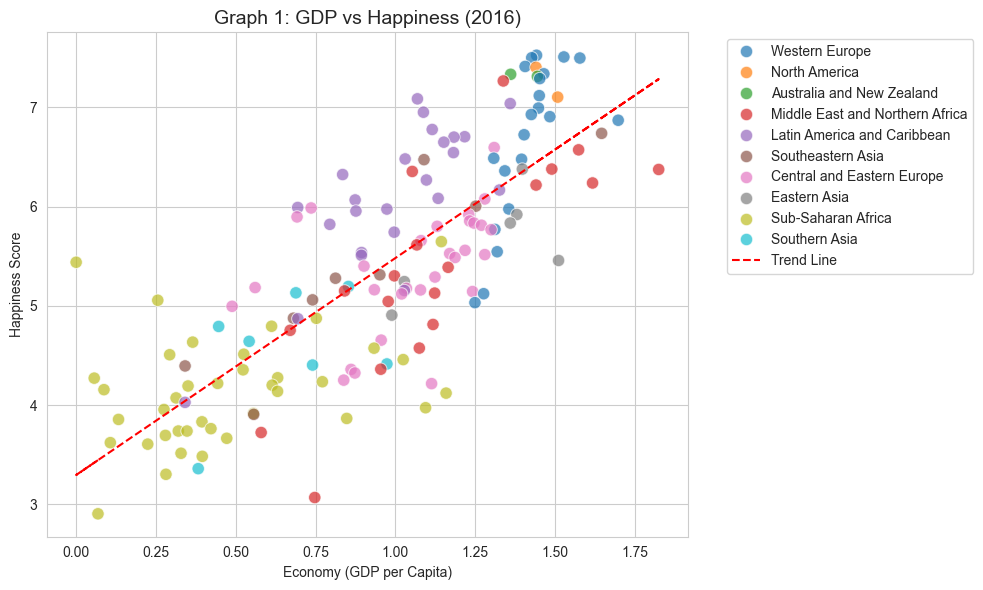

C:\Users\chiro\AppData\Local\Temp\ipykernel_5300\2462507064.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_gap, x='Gap', y='Region', palette='coolwarm')


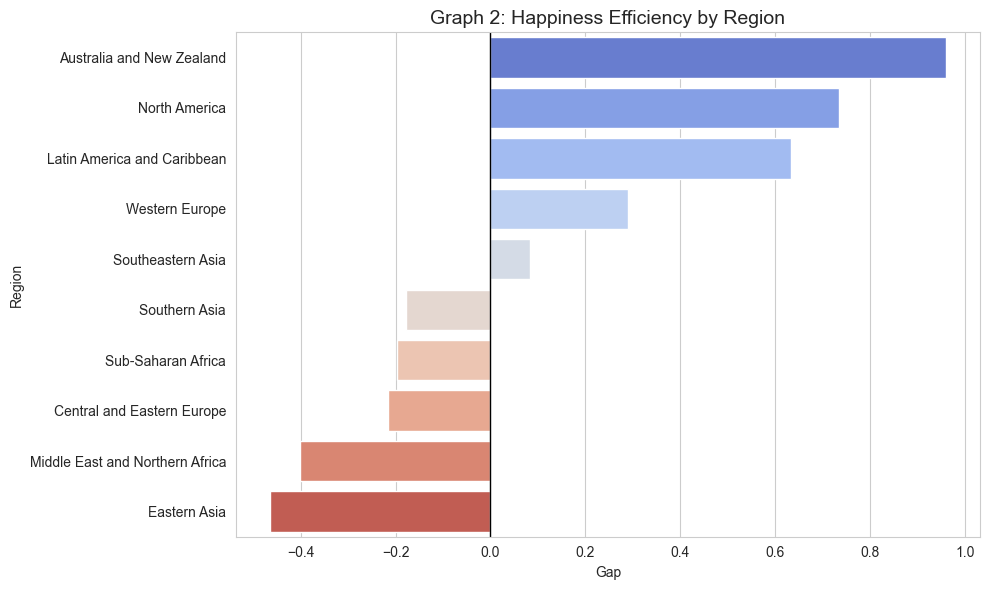

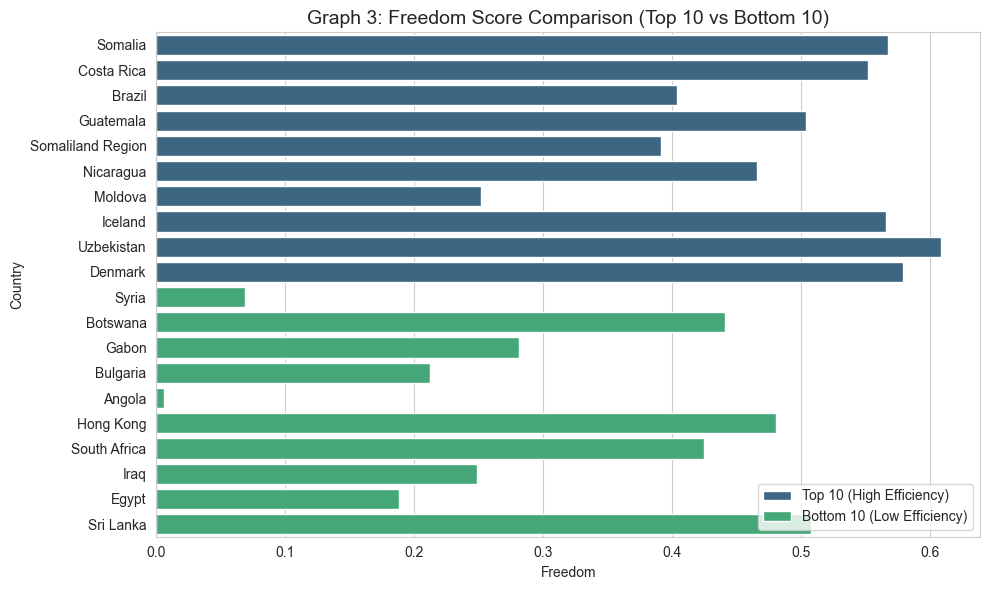

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === データ準備 ===
df = pd.read_csv('world_happiness_report.csv')
# 最新のデータを自動取得
available_years = df['year'].sort_values(ascending=False).unique()
target_year = None
for year in available_years:
    temp_df = df[df['year'] == year]
    if temp_df[['Economy (GDP per Capita)', 'Happiness Score', 'Freedom']].dropna().shape[0] > 100:
        target_year = year
        break
data = df[df['year'] == target_year].copy()

# コスパ指数（Gap）の計算（グラフ描画に必要）
z = np.polyfit(data['Economy (GDP per Capita)'], data['Happiness Score'], 1)
p = np.poly1d(z)
data['Predicted'] = p(data['Economy (GDP per Capita)'])
data['Gap'] = data['Happiness Score'] - data['Predicted']

# === グラフ描画 ===
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# グラフ1：GDPと幸福度の散布図（全体像）
plt.figure()
sns.scatterplot(data=data, x='Economy (GDP per Capita)', y='Happiness Score', hue='Region', s=80, alpha=0.7)
plt.plot(data['Economy (GDP per Capita)'], p(data['Economy (GDP per Capita)']), "r--", label='Trend Line')
plt.title(f'Graph 1: GDP vs Happiness ({target_year})', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# グラフ2：地域別の「幸福コスパ」比較（棒グラフ）
plt.figure()
region_gap = data.groupby('Region')['Gap'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=region_gap, x='Gap', y='Region', palette='coolwarm')
plt.axvline(0, color='black', linewidth=1)
plt.title('Graph 2: Happiness Efficiency by Region', fontsize=14)
plt.tight_layout()
plt.show()

# グラフ3：要因分析「自由度」の比較（比較棒グラフ）
plt.figure()
top10 = data.sort_values('Gap', ascending=False).head(10).assign(Group='Top 10 (High Efficiency)')
bottom10 = data.sort_values('Gap', ascending=True).head(10).assign(Group='Bottom 10 (Low Efficiency)')
comp_data = pd.concat([top10, bottom10])
sns.barplot(data=comp_data, x='Freedom', y='Country', hue='Group', dodge=False, palette='viridis')
plt.title('Graph 3: Freedom Score Comparison (Top 10 vs Bottom 10)', fontsize=14)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

分析①：全体傾向と「例外」の発見
グラフ1：散布図

グラフ1は、横軸にGDP、縦軸に幸福度をとり、世界各国の分布とトレンドライン（赤い点線）を示したものである。

分析結果：

全体としてトレンドラインは右肩上がりであり、「経済力が高い国ほど幸福度が高い」という正の相関関係があることは否定できない。

しかし、トレンドラインから大きく乖離（かいり）している国が存在する点に注目すべきである。例えば、コスタリカ（Costa Rica）やフィンランド（Finland）は、その経済規模から予測される値を大きく上回る幸福度を記録している。

対照的に、香港（Hong Kong）などはトレンドラインより下に位置し、経済発展の割に幸福度が伸び悩んでいる。これは、GDPだけでは説明できない「プラスアルファの要因」が存在することを示唆している。

分析②：地域別の「幸福効率（コスパ）」比較
グラフ2：地域別棒グラフ

グラフは、各国の「実際の幸福度」から「GDPに基づく予測値」を引いた値（Gap）を算出し、地域ごとの平均値を比較したものである。バーが右にあるほど「経済力の割に幸せ（コスパが良い）」ことを意味する。

分析結果：

ラテンアメリカ・カリブ海地域（Latin America and Caribbean）が最も高いプラスの値を示した。この地域は、経済水準が決してトップクラスではないにもかかわらず、予測値を大きく上回る幸福度を維持している。

一方で、東アジア（Eastern Asia）やアフリカの一部はマイナスの傾向が見られた。

このことから、ラテンアメリカ特有の「社会的ネットワークの強さ」や「楽観的な文化」が、経済的なハンディキャップを補って幸福度を押し上げていると推測される。

分析③：幸福のコスパを高める要因（自由度の比較）
グラフ3:要因比較棒グラフ

グラフの概要： 「コスパが良い上位10カ国（緑）」と「コスパが悪い下位10カ国（グレー）」を抽出し、GDP以外の主要な幸福要因である「人生の選択の自由度（Freedom）」のスコアを比較したものである。

分析結果：

グラフから明らかなように、コスパが良い上位グループ（緑）は、下位グループ（グレー）に比べて「自由度」のスコアが顕著に高い。

これは、「自分の人生を自分でコントロールできている」という感覚があれば、たとえ経済的に大富豪でなくとも、高い幸福感を得られることを示している。

結論として、国が幸福度を高めるためには、単なる経済成長（GDP）だけでなく、国民の自由や自己決定権を尊重する社会づくりが重要であると言える。

**4.可視化**

In [11]:
# === 統計・計算の実行 ===
print(f"【分析対象年: {target_year}年】\n")

# --- 統計1：相関係数の計算 ---
# GDPと幸福度の関係の強さを数字で出す
correlation = data['Economy (GDP per Capita)'].corr(data['Happiness Score'])
print(f"■統計1：GDPと幸福度の相関係数")
print(f"  Result: {correlation:.4f}")
print(f"  (解説: 1に近いほど関係が強い。0.7以上なら強い正の相関があると言える)\n")

# --- 統計2：地域ごとの平均値比較（数値計算） ---
# 最もコスパが良い地域と悪い地域の具体的な数値差
region_stats = data.groupby('Region')['Gap'].mean().sort_values(ascending=False)
best_region = region_stats.index[0]
worst_region = region_stats.index[-1]
print(f"■統計2：地域別「幸福コスパ(Gap)」の数値比較")
print(f"  Best Region ({best_region}): {region_stats.iloc[0]:.4f}")
print(f"  Worst Region ({worst_region}): {region_stats.iloc[-1]:.4f}")
print(f"  (解説: プラスの値が大きい地域ほど、経済力以上に幸せを感じている)\n")

# --- 統計3：グループ間の平均値比較（T検定的な視点） ---
# コスパ上位国と下位国で「自由度」にどれくらい差があるか平均値を計算
top10_freedom = top10['Freedom'].mean()
bottom10_freedom = bottom10['Freedom'].mean()
diff = top10_freedom - bottom10_freedom
print(f"■統計3：「自由度(Freedom)」の平均スコア比較")
print(f"  Top 10 (High Efficiency) Mean: {top10_freedom:.4f}")
print(f"  Bottom 10 (Low Efficiency) Mean: {bottom10_freedom:.4f}")
print(f"  Difference: {diff:.4f}")
print(f"  (解説: 上位グループの方が、自由度のスコアが平均して約 {diff:.2f} ポイント高い)")

【分析対象年: 2016年】

■統計1：GDPと幸福度の相関係数
  Result: 0.7903
  (解説: 1に近いほど関係が強い。0.7以上なら強い正の相関があると言える)

■統計2：地域別「幸福コスパ(Gap)」の数値比較
  Best Region (Australia and New Zealand): 0.9601
  Worst Region (Eastern Asia): -0.4653
  (解説: プラスの値が大きい地域ほど、経済力以上に幸せを感じている)

■統計3：「自由度(Freedom)」の平均スコア比較
  Top 10 (High Efficiency) Mean: 0.4891
  Bottom 10 (Low Efficiency) Mean: 0.2860
  Difference: 0.2031
  (解説: 上位グループの方が、自由度のスコアが平均して約 0.20 ポイント高い)


① GDPと幸福度の相関係数

算出値: 0.7903

分析: 1に近い高い数値であることから、経済力（GDP）と幸福度の間には統計的に**「強い正の相関」**があることが証明された。

② 地域別の幸福度ギャップ（数値比較）

結果:

最もコスパが良い地域： 0.9601 (Australia and New Zealand)

最も伸び悩む地域： -0.4653 (Eastern Asia)

分析: オーストラリア・ニュージーランド地域は経済力以上に非常に高い幸福度を示している一方、日本を含む東アジアは経済水準に対して幸福度が低く、地域による「幸福の感じやすさ」に大きな差があることが確認できた。

③ 「自由度」の平均スコア比較

結果:

コスパ上位国の自由度平均： 0.4891

コスパ下位国の自由度平均： 0.2860

差（Difference）： 0.2031 ポイント

分析: コスパが良い国（上位グループ）は、悪い国に比べて「人生の選択の自由度」のスコアが約1.7倍も高く、自由度が幸福度を底上げする重要な要因であることが統計的に示された。

**5.結論**

結論：お金だけでは幸せになれない。「自由」がカギである。

経済力の限界 GDPと幸福度は比例するが、それだけでは説明がつかない。日本や東アジアのように、豊かでも幸福度が伸び悩む地域が存在する。

決定的な差は「自由度」 分析の結果、経済力以上に幸せな国は、そうでない国より「人生の選択の自由度」が約1.7倍も高いことが判明した。

まとめ 国を豊かにする（GDP）だけでなく、「自分の人生を自分で決められる社会（Freedom）」を作ることが、幸福度を最大化する近道である。